<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Association_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
0,0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.8998,256.67,91.0,5.559,215.0,81.0,123.0,99.0,65.810,1
1,1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.6377,260.39,86.0,5.489,219.0,64.0,146.0,73.0,105.881,1
2,2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,...,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,51.688,1
3,3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,...,4.9215,206.32,89.0,5.414,205.0,69.0,139.0,76.0,20.270,1
4,4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,47.001,1


In [4]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation',
       'StartDTTM', 'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
  

In [5]:
df.shape

(52620, 83)

In [6]:
selected_columns = ['Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'eGFR_t1', 'VisitLocation',
       'G1M2-ARB', 'G3M1-Statin','G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
df_selected = df[selected_columns]
df_selected.head()

,Slopes,InPatient,OutPatient,Emergency,eGFR_t1,VisitLocation,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
0,-7.158596,0,1,0,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,90,0,0,0,...,5.8998,256.67,91.0,5.559,215.0,81.0,123.0,99.0,65.810,1
1,5.550691,0,1,0,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,90,90,0,0,...,5.6377,260.39,86.0,5.489,219.0,64.0,146.0,73.0,105.881,1
2,-6.063710,0,1,0,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,100,100,34,0,...,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,51.688,1
3,-12.812245,0,1,0,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,35,0,1,35,...,4.9215,206.32,89.0,5.414,205.0,69.0,139.0,76.0,20.270,1
4,28.287500,0,1,0,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,100,0,15,0,...,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,47.001,1


###Binning Age Column

In [7]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [18, 35, 60]
labels = ['early_adulthood', 'middle_adulthood','later_maturity']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['age'] = binning(df_selected['Age'], cut_points, labels)

<ipython-input-7-832eae1385a2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['age'] = binning(df_selected['Age'], cut_points, labels)


###แบ่งข้อมูลตาม Slope Column

In [8]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope >-0.5:
        return 'better'
    else:
        return 'worse'

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['slope_Category'] = df_selected['Slopes'].apply(categorize_slope)

<ipython-input-8-571829e09601>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['slope_Category'] = df_selected['Slopes'].apply(categorize_slope)


### แบ่งข้อมูลตาม  eGFR_t1 & L1-eGFR Column

In [9]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)

<ipython-input-9-f9b2f482afe6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
<ipython-input-9-f9b2f482afe6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)


### Binning Systolic BP Column

In [29]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [0, 120, 140, 160]
labels = ['Normal', 'Prehypertension','Hypertension_Stage I','Hypertension_Stage II']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)

<ipython-input-29-0c977b4d707e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)


### Binning Diastolic BP Column

In [31]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [0, 80, 90, 100]
labels = ['Normal', 'Prehypertension','Hypertension_Stage I','Hypertension_Stage II']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)

### Binning BSA Column

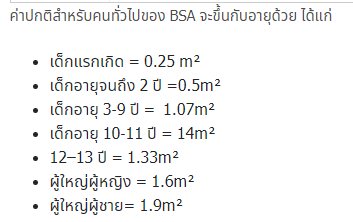

### Binning BMI Column

In [28]:
def interpret_BMI(BMI_value):
    if BMI_value < 18.5:
        return 'below threshold'
    elif 18.5 <= BMI_value <= 22.9:
        return 'normal and proportional'
    elif 23 <= BMI_value <= 24.9:
        return 'overweight'
    elif 25 <= BMI_value <= 29.9:
        return 'Obesity level 1'
    else:
        return 'Obesity level 2'

# เพิ่มคอลัมน์ 'bmi' ที่บอกระดับของ 'interpret_BMI'
df_selected['bmi'] = df_selected['BMI'].apply(interpret_BMI)

<ipython-input-28-c000ed2f2d46>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['bmi'] = df_selected['BMI'].apply(interpret_BMI)


In [10]:
df_selected.columns

Index(['Slopes', 'InPatient', 'OutPatient', 'Emergency', 'eGFR_t1',
       'VisitLocation', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-S

In [27]:
selected_columns = ['InPatient', 'OutPatient', 'Emergency',
       'Sex','age', 'slope_Category','eGFR_t1_Category', 'eGFR_Category',
       'NATNL','D1-Hypertension', 'D2-Diabetes-mellitus',
       'D3-Dyslipidemia', 'D4-SLE','D5-Systemic-sclerosis',
       'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy']

unique_values_per_column = {col: df_selected[col].unique().tolist() for col in selected_columns}
unique_values_per_column

{'InPatient': [0, 1],
 'OutPatient': [1, 0],
 'Emergency': [0, 1],
 'Sex': [1, 0],
 'age': ['later_maturity', 'middle_adulthood', 'early_adulthood'],
 'slope_Category': ['worse', 'better'],
 'eGFR_t1_Category': ['stage 2',
  'stage 3a',
  'stage 3b',
  'stage 5',
  'stage 1',
  'stage 4'],
 'eGFR_Category': ['stage 2',
  'stage 3a',
  'stage 3b',
  'stage 4',
  'stage 5',
  'stage 1'],
 'NATNL': [0, 3, 2, 1],
 'D1-Hypertension': [0, 1, 2, 3, 4],
 'D2-Diabetes-mellitus': [2, 1, 0, 3, 4, 6],
 'D3-Dyslipidemia': [0, 1, 2, 3, 7],
 'D4-SLE': [0, 1, 2, 3],
 'D5-Systemic-sclerosis': [0, 1, 2],
 'D6-Rheumatoid-arthritis': [0, 1, 2, 5, 3],
 'D7-HIV-infection': [0, 1],
 'D8-HBV-infection': [0, 1, 2],
 'D9-HCV-infection': [0, 1],
 'D10-Ischemic-heart-disease': [0, 1, 2],
 'D11-Heart-failure': [0, 1, 2],
 'D12-Thalassemia': [0, 1],
 'D13-Kidney-stone': [0, 1, 2, 3],
 'D14-Valvular-heart-disease': [0, 1, 2],
 'D15-Solid-malignancy': [0, 2, 1],
 'D16-Hematologic-malignancy': [0, 1, 2]}

*   NATNL และ กลุ่ม D ต้องไปดูโค้ดนิ้งอีกที ค่ามันดูแปลกๆ (มันเป็นการวินิจฉัยควรจะมีแค่ 0,1 รึเปล่า)
*   group ที่ต้องแบ่งช่วง
  1.   Druggroups
  2.   Labgroups